In [1]:
import cv2
import rasterio
import starfm
from rasterio.transform import from_origin
import numpy as np
import sys
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [2]:
F0 = cv2.imread("../Images/sim_Landsat_t1.tif")
C0 = cv2.imread("../Images/sim_MODIS_t1.tif")
C1 = cv2.imread("../Images/sim_MODIS_t2.tif")

In [3]:
realF1 = cv2.imread("../Images/sim_Landsat_t2.tif")
F1_control = cv2.imread("../results/output.tif")
F1_combination = starfm.prediction(F0, C0, C1)

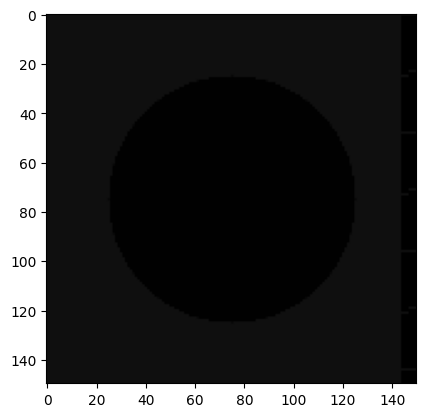

In [4]:
plt.imshow(realF1, cmap='gray')
plt.show()

In [5]:
data1 = realF1
data2 = F1_combination

### Root Mean Squares

In [6]:
rmse = np.sqrt(np.mean((data1 - data2)**2))
rmse

1.2465597102069002

### Peak Signal-to-noise Ratio

In [7]:
mse = np.mean((data1 - data2)**2)
if mse == 0:
    psnr = float('inf')
else:
    max_value = np.iinfo(data1.dtype).max
    psnr = 20 * np.log10(max_value / np.sqrt(mse))
psnr

46.21654188782721

### Mean Absolute Error

In [8]:
mae = np.mean(np.abs(data1 - data2))
mae

1.2136444444444445

### Structural Similarity Index

In [9]:
ssimVal = ssim(data1, data2, multichannel=True)
ssimVal

/var/folders/6v/tkqp5lhn4l90pnrnv57z_cnw0000gn/T/ipykernel_29892/4040186010.py:1: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssimVal = ssim(data1, data2, multichannel=True)


0.9875053982384615